In [2]:
#Caroline aboleil , 25/6/23
#this project was submitted as an assignment in a data analysis course

# loading , cleaning and storing online flights data

### in this project we are loading online data from Israel's Airports Authority and then cleaning,analyzing and storing them with the help of pandas and other python libraries


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import requests
import json


### loading the data:

In [30]:
r = requests.get("https://data.gov.il/api/3/action/datastore_search?resource_id=e83f763b-b7d7-479e-b172-ae981ddc6de5&limit=5000")
res = json.loads(r.content)
df = pd.DataFrame(res['result']['records'])

In [31]:
df

,_id,CHOPER,CHFLTN,CHOPERD,CHSTOL,CHPTOL,CHAORD,CHLOC1,CHLOC1D,CHLOC1TH,CHLOC1T,CHLOC1CH,CHLOCCT,CHTERM,CHCINT,CHCKZN,CHRMINE,CHRMINH
0,1,TWI,502,TAILWIND AIRLINES,2023-07-15T12:35:00,2023-07-15T14:53:00,D,AYT,ANTALYA,אנטליה,ANTALYA,טורקיה,TURKEY,3,81-83,D,DEPARTED,המריאה
1,2,AZ,807,ITALIA TRASPORTO AEREO,2023-07-15T14:50:00,2023-07-15T14:55:00,D,FCO,ROME - FIUMICINO,רומא,ROME,איטליה,ITALY,3,8-11,A,DEPARTED,המריאה
2,3,FR,7162,RYANAIR,2023-07-15T14:10:00,2023-07-15T14:58:00,D,VIE,VIENNA,וינה,VIENNA,אוסטריה,AUSTRIA,1,361-369,D,DEPARTED,המריאה
3,4,A4,552,AZIMUTH AIRLINES,2023-07-15T14:10:00,2023-07-15T15:03:00,D,MRV,MINERALNYE VODY,מינראל וודי,MINERALNYE VODY,רוסיה,RUSSIAN FEDERATION,3,G16-G18,G,DEPARTED,המריאה
4,5,SN,3289,BRUSSELS AIRLINES,2023-07-15T15:15:00,2023-07-15T15:08:00,A,BRU,BRUSSELS,בריסל,BRUSSELS,בלגיה,BELGIUM,3,None,None,LANDED,נחתה
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,3023,HU,7958,HAINAN AIRLINES,2023-07-19T14:40:00,2023-07-19T14:40:00,D,PEK,BEIJING,בייג'ינג,BEIJING,סין,CHINA,3,None,None,ON TIME,בזמן
3023,3024,LY,5107,EL AL ISRAEL AIRLINES,2023-07-19T14:40:00,2023-07-19T14:40:00,D,TBS,TBILISI,טביליסי,TBILISI,גיאורגיה,GEORGIA,3,None,None,ON TIME,בזמן
3024,3025,FB,571,BULGARIA AIR,2023-07-19T14:45:00,2023-07-19T14:45:00,A,SOF,SOFIA,סופיה,SOFIA,בולגריה,BULGARIA,3,None,None,NOT FINAL,לא סופי
3025,3026,IZ,511,ARKIA ISRAELI AIRLINES,2023-07-19T14:45:00,2023-07-19T14:45:00,D,AMS,AMSTERDAM,אמסטרדם,AMSTERDAM,הולנד,NETHERLANDS,3,None,None,ON TIME,בזמן


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3027 entries, 0 to 3026
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   _id       3027 non-null   int64 
 1   CHOPER    3027 non-null   object
 2   CHFLTN    3027 non-null   object
 3   CHOPERD   3027 non-null   object
 4   CHSTOL    3027 non-null   object
 5   CHPTOL    3027 non-null   object
 6   CHAORD    3027 non-null   object
 7   CHLOC1    3027 non-null   object
 8   CHLOC1D   3027 non-null   object
 9   CHLOC1TH  3027 non-null   object
 10  CHLOC1T   3027 non-null   object
 11  CHLOC1CH  3027 non-null   object
 12  CHLOCCT   3027 non-null   object
 13  CHTERM    3027 non-null   object
 14  CHCINT    1248 non-null   object
 15  CHCKZN    1248 non-null   object
 16  CHRMINE   3027 non-null   object
 17  CHRMINH   3027 non-null   object
dtypes: int64(1), object(17)
memory usage: 425.8+ KB


## cleaning the data:

In [33]:
#calculating the percentage of empty rows in each column:
for i in  df.columns :
    print(i , df[i].isna().sum() / len(df.index) * 100 , '%')

_id 0.0 %
CHOPER 0.0 %
CHFLTN 0.0 %
CHOPERD 0.0 %
CHSTOL 0.0 %
CHPTOL 0.0 %
CHAORD 0.0 %
CHLOC1 0.0 %
CHLOC1D 0.0 %
CHLOC1TH 0.0 %
CHLOC1T 0.0 %
CHLOC1CH 0.0 %
CHLOCCT 0.0 %
CHTERM 0.0 %
CHCINT 58.77106045589693 %
CHCKZN 58.77106045589693 %
CHRMINE 0.0 %
CHRMINH 0.0 %


In [34]:
#dropping the empty rows:
df.dropna(inplace = True)

In [35]:
#deleting columns that wont be benefitial for our project:
del df['_id']
del df['CHOPERD']
df = df.drop(columns = ['CHLOC1TH', 'CHLOC1CH', 'CHRMINH'] )

In [36]:
#renaming the columns for easier work:
df.rename(columns ={'CHOPER' : 'Airline' ,'CHFLTN' : 'FlightNum' , 'CHSTOL':'PlanTime' ,'CHPTOL' : 'ActualTime'
                   ,'CHAORD' : 'Direction' , 'CHLOC1' : 'Airport' ,'CHLOC1D' :'City' ,'CHLOCCT' :'Country'
                   , 'CHTERM':'Terminal' , 'CHRMINE' : 'Status'} , inplace = True)

In [37]:
#changing the type of datetime columns to an appropriate datetime type:
df['PlanTime'] = df['PlanTime'].astype('datetime64[ns]')
df['ActualTime'] = df['ActualTime'].astype('datetime64[ns]')

In [38]:
#calculating the  total delay in minutes in a new column:
df['time_diff'] = (df['ActualTime'] - df['PlanTime']).dt.total_seconds()/60

In [39]:
#Displaying total delay distribution by Airlines:
print('DelayByAirline ' , df.groupby('Airline').time_diff.mean())

DelayByAirline  Airline
2S    18.000000
5F     0.000000
5W     0.000000
6E     4.875000
6H    24.472727
        ...    
W9    25.833333
WZ    42.000000
XC     3.066667
XQ    12.200000
XR     3.000000
Name: time_diff, Length: 92, dtype: float64


In [40]:
#Displaying total delay distribution by Terminals:
print('DelayByTerminals' , df.groupby('Terminal').time_diff.mean())

DelayByTerminals Terminal
1    30.835106
3     9.435849
Name: time_diff, dtype: float64


In [41]:
#Displaying total delay distribution by Date:
print('DelayByDate' , df.groupby(df['PlanTime'].dt.date).time_diff.mean())

DelayByDate PlanTime
2023-07-15    59.398058
2023-07-16    23.612195
2023-07-17     0.000000
2023-07-18     0.000000
2023-07-19     0.000000
Name: time_diff, dtype: float64


## Storing the clean data:

In [42]:
df.to_csv('CleanData', index=False)

## Visualizations:

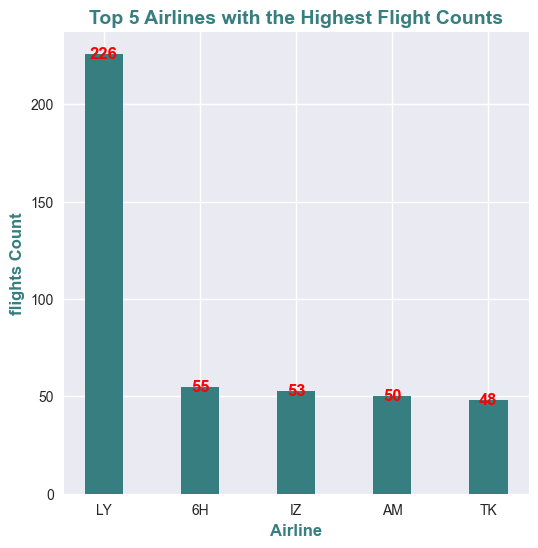

In [43]:
#1:This graph provides a clear visual representation of the top airlines with the highest flight counts,
#allowing for easy comparison and identification of the airlines with the most significant presence:
Airlines = df.groupby('Airline').count()['FlightNum'].nlargest(5)
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(6,6))
plt.bar(Airlines.index, Airlines.values , width = 0.4 , color = '#367E7F')
plt.xlabel('Airline' ,fontsize = 12 , color = '#367E7F' , weight='bold')
plt.ylabel('flights Count' , fontsize = 12 , color = '#367E7F' ,weight='bold')
plt.title('Top 5 Airlines with the Highest Flight Counts' , fontsize = 14 , color = '#367E7F' ,weight='bold')
for i,j in zip(Airlines.index,Airlines):
    plt.annotate(str(j),xy=(i,j),color='r',ha="center", va="center", rotation=0, size=12 , weight='bold')
plt.show()

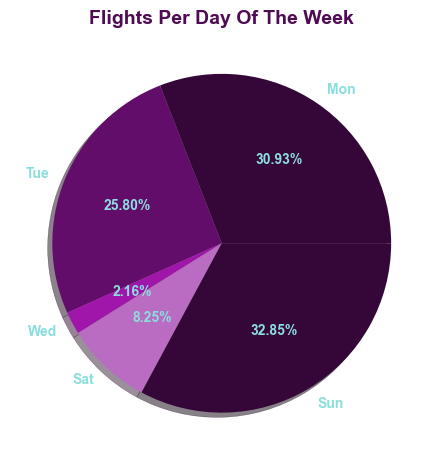

In [44]:
#2: displaying the percentage of the number of  flights in each day of the week:
import calendar
days_of_week = df.groupby(df['PlanTime'].dt.dayofweek).count()['FlightNum']
days_of_week.index = days_of_week.index.map(lambda x: calendar.day_abbr[x])
plt.pie(days_of_week.values, labels=days_of_week.index, autopct='%1.2f%%' , shadow=True
         ,  colors =['#340738','#620D69' , '#A016AB' ,'#BA6BC2' ] ,textprops={ 'color': '#8BDDDE','weight': 'bold'})
plt.title('Flights Per Day Of The Week' ,
          fontsize = 14 , color = '#4F0B54',weight='bold' )
plt.show()

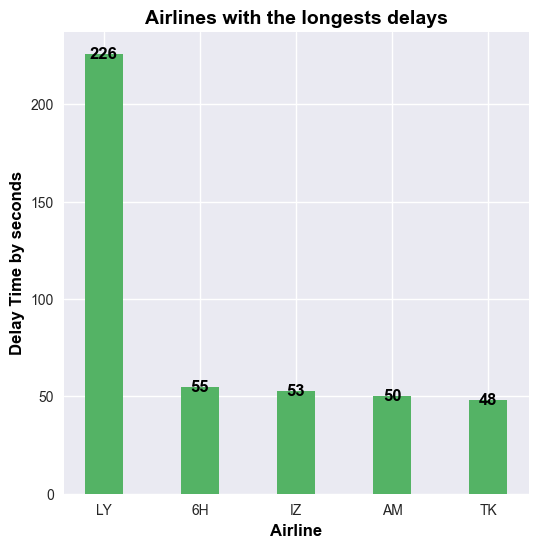

In [45]:
#3: displaying the top 5 airlines with the longest dealays:
Airlines = df.groupby('Airline').count()['time_diff'].nlargest(5)
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(6,6))
plt.bar(Airlines.index, Airlines.values , width = 0.4 , color = '#54B365')
plt.xlabel('Airline' ,fontsize = 12 , color = 'k' , weight='bold')
plt.ylabel('Delay Time by seconds' , fontsize = 12 , color = 'k' ,weight='bold')
plt.title('Airlines with the longests delays' , fontsize = 14 , color = 'k' ,weight='bold')
for i,j in zip(Airlines.index,Airlines):
    plt.annotate(str(j),xy=(i,j),color='black',ha="center", va="center", rotation=0, size=12 , weight='bold')
plt.show()

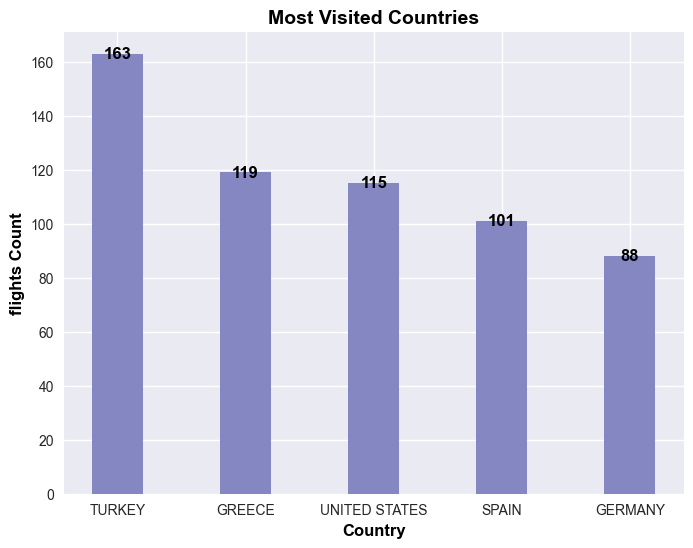

In [46]:
#4:The top 5 most visited countries:
Countries = df.groupby('Country').count()['FlightNum'].nlargest(5)
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(8,6))
plt.bar(Countries.index, Countries.values , width = 0.4 , color = '#8487C2')
plt.xlabel('Country' ,fontsize = 12 , color = 'k' , weight='bold')
plt.ylabel('flights Count' , fontsize = 12 , color = 'k' ,weight='bold')
plt.title('Most Visited Countries' , fontsize = 14 , color = 'k' ,weight='bold')
for i,j in zip(Countries.index,Countries):
    plt.annotate(str(j),xy=(i,j),color='k',ha="center", va="center", rotation=0, size=12 , weight='bold')
plt.show()

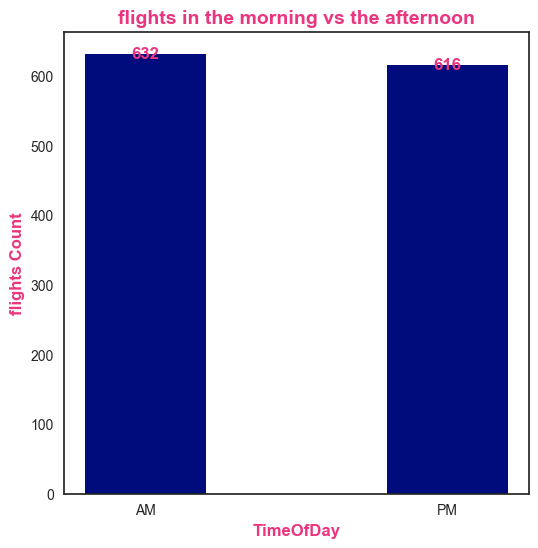

In [47]:
#5:Displaying the percentages of flights in the morning vs the afternoon:
time_groups = np.where(df['PlanTime'].dt.hour < 12, 'AM', 'PM')
groups = df.groupby(time_groups).count()['FlightNum']

plt.style.use('seaborn-v0_8-white')
plt.figure(figsize=(6,6))
plt.bar(groups.index, groups.values , width = 0.4 , color = '#000C7B')
plt.xlabel('TimeOfDay' ,fontsize = 12 , color = '#EA3680' , weight='bold')
plt.ylabel('flights Count' , fontsize = 12 , color = '#EA3680' ,weight='bold')
plt.title('flights in the morning vs the afternoon' , fontsize = 14 , color = '#EA3680' ,weight='bold')
for i,j in zip(groups.index,groups):
    plt.annotate(str(j),xy=(i,j),color='#EA3680',ha="center", va="center", rotation=0, size=12 , weight='bold')
plt.show()